In [189]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Generating Random Dataset

In [190]:
X = np.vstack([(np.random.randn(10, 2)*5),(np.random.randn(10, 2)*10)])
Y = np.hstack([[0]*10,[1]*10])
dataset = pd.DataFrame(X, columns=['X1','X2'])
dataset["Y"] = Y

# Random Data set generated

In [191]:
dataset

,X1,X2,Y
0,-2.744227,-1.896876,0
1,-4.659282,7.639204,0
2,9.726795,7.618802,0
3,4.173637,0.525153,0
4,4.230135,3.558695,0
5,-1.332493,6.040368,0
6,5.840026,0.755107,0
7,6.870440,-9.612960,0
8,1.274547,-2.974380,0
9,-1.003754,-0.066008,0


### Generating plot

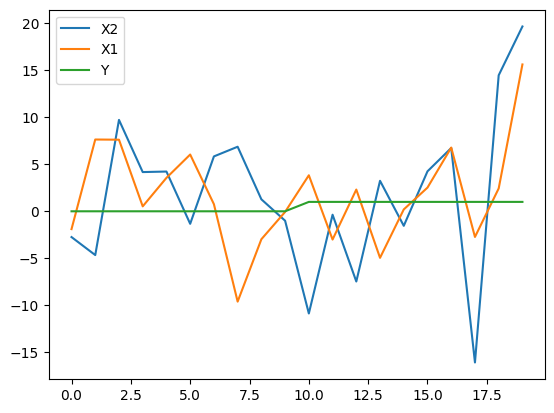

In [192]:
plt.plot(dataset, label='Inline label')
plt.legend(["X2", "X1", "Y"])

### Generating target variable to vector of number of classes 

In [193]:
Z = np.zeros((20, 2))
for i in range(20):
    Z[i, Y[i]] = 1

In [194]:
X.shape

(20, 2)

### Initiating Random Weights and Biases

In [195]:
Wi_1 = np.random.randn(3, 2)
Bi_1 = np.random.randn(3)
Wi_2 = np.random.randn(3, 2)
Bi_2 = np.random.randn(2)

In [196]:
Wi_1, Bi_1, Wi_2, Bi_2

(array([[-0.57051809,  0.71086803],
        [ 1.28177457,  0.188689  ],
        [-1.42981765, -0.98906052]]),
 array([ 0.84278061,  1.59394849, -0.14367629]),
 array([[ 1.62023091,  0.27196958],
        [-1.41256176, -1.03219971],
        [ 1.18373715,  1.78923561]]),
 array([-0.92274382,  0.27403402]))

In [197]:
Wi_1.T

array([[-0.57051809,  1.28177457, -1.42981765],
       [ 0.71086803,  0.188689  , -0.98906052]])

In [198]:
X

array([[ -2.74422717,  -1.89687555],
       [ -4.65928173,   7.63920434],
       [  9.72679509,   7.61880217],
       [  4.17363659,   0.52515273],
       [  4.23013543,   3.55869498],
       [ -1.33249267,   6.04036798],
       [  5.84002572,   0.75510693],
       [  6.87044036,  -9.61296044],
       [  1.27454703,  -2.97437991],
       [ -1.00375429,  -0.066008  ],
       [-10.87579863,   3.83291641],
       [ -0.36472958,  -3.00689517],
       [ -7.47245625,   2.31245357],
       [  3.24353113,  -4.95365818],
       [ -1.54717368,   0.19807914],
       [  4.25386885,   2.5223112 ],
       [  6.73538592,   6.78180196],
       [-16.09053694,  -2.73064695],
       [ 14.47501245,   2.43343714],
       [ 19.6689866 ,  15.62720211]])

In [199]:
X.shape

(20, 2)

In [200]:
X.dot(Wi_1.T)

array([[  0.21720306,  -3.87540015,   5.79986915],
       [  8.08867068,  -4.53071503,  -0.89371213],
       [ -0.13334968,  13.90514277, -21.44299971],
       [ -2.0078209 ,   5.4487518 ,  -6.48694709],
       [  0.1163937 ,   6.09356662,  -9.56808698],
       [  5.05411567,  -0.56820424,  -4.06906794],
       [ -2.79505896,   7.62807684,  -9.0970183 ],
       [-10.75325679,   6.99249587,  -0.31567726],
       [ -2.84154373,   1.0724492 ,   1.1194719 ],
       [  0.52573701,  -1.2990417 ,   1.5004715 ],
       [  8.92953763, -13.21709298,  11.75942255],
       [ -1.92942082,  -1.03486915,   3.49549808],
       [  5.9070208 ,  -9.14166987,   8.39709331],
       [ -5.37189044,   3.22277493,   0.26180966],
       [  1.0234987 ,  -1.94575252,   2.01626397],
       [ -0.63387874,   5.92843329,  -8.57697517],
       [  0.97830669,   9.91289782, -16.33798621],
       [  7.23881281, -21.13968414,  25.7073088 ],
       [ -6.52840382,  19.01286571, -23.10344487],
       [ -0.1126343 ,  28.15988

### Defining the Forward Propogation function

In [201]:
def forward_prop(X, Wi_1, Bi_1, Wi_2, Bi_2):
    # First layer
    M = 1/(1+np.exp(-(X.dot(Wi_1.T) + Bi_1)))
    # Second layer
    A = M.dot(Wi_2) + Bi_2
    # Softmax
    expA = np.exp(A)
    Y = expA/expA.sum(axis=1, keepdims=True)
    return Y, M

In [202]:
forward_prop(X, Wi_1, Bi_1, Wi_2, Bi_2)

(array([[0.30278334, 0.69721666],
        [0.4934296 , 0.5065704 ],
        [0.33772847, 0.66227153],
        [0.22148163, 0.77851837],
        [0.35382498, 0.64617502],
        [0.4648018 , 0.5351982 ],
        [0.19630264, 0.80369736],
        [0.1404673 , 0.8595327 ],
        [0.13808499, 0.86191501],
        [0.30543218, 0.69456782],
        [0.38838883, 0.61161117],
        [0.15660755, 0.84339245],
        [0.38802185, 0.61197815],
        [0.13235393, 0.86764607],
        [0.32937001, 0.67062999],
        [0.30306522, 0.69693478],
        [0.39730854, 0.60269146],
        [0.38830761, 0.61169239],
        [0.17184907, 0.82815093],
        [0.33910555, 0.66089445]]),
 array([[7.42687424e-01, 9.26708207e-02, 9.96516377e-01],
        [9.99867851e-01, 5.03657012e-02, 2.61654215e-01],
        [6.70275405e-01, 9.99999814e-01, 4.21721491e-10],
        [2.37752644e-01, 9.99126999e-01, 1.31760202e-03],
        [7.22956458e-01, 9.99541694e-01, 6.05631562e-05],
        [9.97259570e-01, 7.3

## Back Propogation by Differentiating or Gradient Descent

In [203]:
# returns gradient for weights_2
def diff_Wi_2(H, Z, Y):
    return H.T.dot(Z-Y)

In [204]:
# returns gradient for weights_1
def diff_Wi_1(X, H, Z, output, Wi_2):
    dZ = (Z-output).dot(Wi_2.T) * H * (1-H)
    return X.T.dot(dZ)

In [205]:
# returns derivative for both biases
def diff_Bi2(Z, Y):
    return (Z-Y).sum(axis=0)

def diff_Bi1(Z, Y, Wi_2, H):
    return ((Z-Y).dot(Wi_2.T) * H * (1-H)).sum(axis=0)

In [206]:
learning_rate = 1e-3
for epoch in range(200000):
    output, hidden = forward_prop(X, Wi_1, Bi_1, Wi_2, Bi_2)
    Wi_2 += learning_rate * diff_Wi_2(hidden, Z, output)
    Bi_2 += learning_rate * diff_Bi2(Z, output)
    Wi_1 += learning_rate * diff_Wi_1(X, hidden, Z, output, Wi_2).T
    Bi_1 += learning_rate * diff_Bi1(Z, output, Wi_2, hidden)

### Generating predectition at new datapoint

In [210]:
X_test = np.array([4,1])

hidden_output = 1/(1+np.exp(-(X_test.dot(Wi_1.T) + Bi_1)))
Outer_layer_output = hidden_output.dot(Wi_2) + Bi_2
expA = np.exp(Outer_layer_output)
Y = expA/expA.sum()
print(" porb of class 0 >>>>>>>>>>>>> {} \n prob of class 1 >>>>>>>>>>>>> {} ".format(Y[0], Y[1]))

 porb of class 0 >>>>>>>>>>>>> 0.6698605399356947 
 prob of class 1 >>>>>>>>>>>>> 0.3301394600643053 
